In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_10108/440907590.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [4]:
x=np.linspace(-5,5,91)
X,Y=np.meshgrid(x,x)
# 91x91 each

nGauss=2000
widths = np.linspace(2,20,nGauss)

picNoOcc=torch.zeros(nGauss,1,91,91)
picOcc=torch.zeros(nGauss,1,91,91)
for i in range(nGauss):
  ro=np.random.randn(2)
  G=np.exp(-(((X-ro[0])**2)+(Y-ro[1])**2)/widths[i])
  G=G+np.random.randn(91,91)/5
  picNoOcc[i]=torch.Tensor(G)
  i1 = np.random.choice(np.arange(0,91))
  i2 = np.random.choice(np.arange(2,7))

  if np.random.randn():
    G[i1:i1+i2,]=1

  else:
    G[:,i1:i1+i2]=1
  picOcc[i]=torch.Tensor(G)


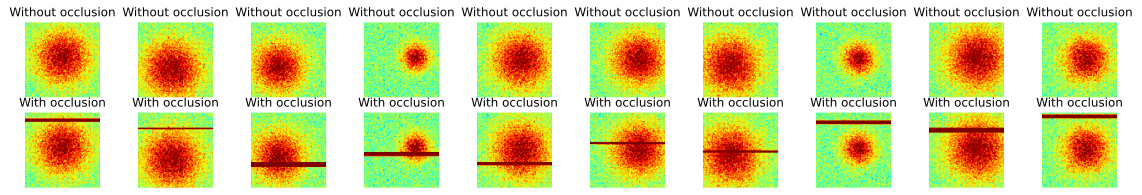

In [7]:
idsToVisualize=np.random.choice(nGauss,size=32,replace=False)
fig,axs=plt.subplots(2,10,figsize=(20,3))

for i in range(10):
  axs[0,i].imshow(torch.squeeze(picNoOcc[idsToVisualize[i]]),vmin=-1,vmax=1,cmap='jet')
  axs[0,i].set_title('Without occlusion')
  axs[0,i].axis('off')

  axs[1,i].imshow(torch.squeeze(picOcc[idsToVisualize[i]]),vmin=-1,vmax=1,cmap='jet')
  axs[1,i].set_title('With occlusion')
  axs[1,i].axis('off')
plt.show()
